<a href="https://colab.research.google.com/github/jhansi117/Purchase_behaviour_predicter/blob/main/internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum() #checking for null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum() #checking for duplicated values

0

In [ ]:
df.drop(columns=['User ID'],inplace=True) #droping column user_id and inplace is added to make the changes permanent

In [ ]:
df.info() #the gender column is not numerical so we have to convert it into numerical
#One way of converting non-numerical values into numerical is by using get_dummies by pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
# pd.get_dummies(df) #getting the dummy numerical values for columns with non-numerical values
df = pd.get_dummies(df,drop_first=True) #watch why the gender_female column is removes in 9th video
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [ ]:
df.info() #checking if all the values are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
 3   Gender_Male      400 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 9.9 KB


In [ ]:
df['Purchased'].value_counts() #checking how many would purchase and how many would not

0    257
1    143
Name: Purchased, dtype: int64

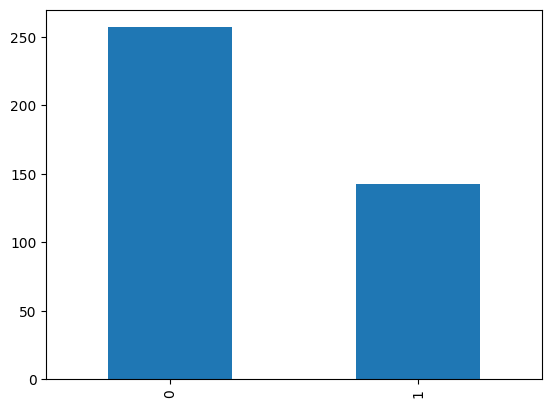

In [ ]:
df['Purchased'].value_counts().plot(kind='bar') #ploting how many would purchase and how many would not
plt.show()

In [ ]:
X = df.iloc[:,[0,1,3]].values #setting the input and output values from the dataset
Y = df.iloc[:,2].values
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #importing the classifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=17,metric='euclidean') #creating an object of the classifier

In [ ]:
model.fit(X,Y) #fitting the input and output into the model
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]])

In [ ]:
y_p = model.predict(X) #predicting the output for all the values of X
y_p

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix#evaluation matrix

In [ ]:
accuracy_score(Y,y_p) #checking for the accuracy

0.83

In [ ]:
pd.DataFrame(confusion_matrix(Y,y_p),index=['acutal_not_purchased','actual_purchased'],columns=['predicted_not_purchased','predicted_purchased'])

,predicted_not_purchased,predicted_purchased
acutal_not_purchased,239,18
actual_purchased,50,93


In [ ]:
print(classification_report(Y,y_p)) #printing out the classification report

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       257
           1       0.84      0.65      0.73       143

    accuracy                           0.83       400
   macro avg       0.83      0.79      0.80       400
weighted avg       0.83      0.83      0.82       400



In [ ]:
pred = model.predict([[   49, 36000,     0]])
pred[0]

1

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.0 MB/s eta 0:00:00


In [ ]:
import joblib
joblib.dump(model,"knn_model")

['knn_model']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load("knn_model")
st.title("Social Media Ads classifier.")
age = st.number_input('Enter your age',min_value=18, max_value=110,value=20,step=1)
salary = st.number_input('Enter your salary',min_value=1000,max_value=150000,value=25000,step=1)
gender = st.radio(
        "Select your gender 👇",
        ["Male", "Female"],
        key="visibility",
    )
if gender=="Male":
    gender = 1
else:
    gender = 0
if st.button("PREDICT"):
    op = model.predict([[age,salary,gender]])
    result = str(op[0])
    if result == '0':
        st.header("Will not purchase..")
    if result == '1':
        st.header("Will purchase!")

Writing app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.90.234.93
